# How a waiting time model leads to the Poisson and exponential distributions

In the previous lesson, we discussed that the assumptions behind exponentially distributed waiting times are–

* Events occur at a fixed average rate which does not change during the simulation.

* Events are independent so past events do not influence future events.

In this notebook, we implement a simulation to confirm/demonstrate how a Poisson distribution over the number of events per time interval and an exponential distribution over the waiting time between consecutive events arise from these assumptions.

## Outline

The basic idea behind the theoretical proof also gives us a framework for implementing the simulation to check the theoretical results. The theoretical proof isn't reproduced in detail here, but [you can find an outline of the proof here](https://en.wikipedia.org/wiki/Poisson_limit_theorem).

In the theoretical proof, we assume events occur with a fixed average rate of $mu$ events per unit interval.

* So, in an interval of length 1, we should observe $mu$ events on average.
* In an interval of length $\ell$, we should observe $\mu\ell$ events, on average.

If we take a unit interval and divide it into $n$ smaller sub-intervals of length $1/n$, the average number of events per sub-interval is $\mu/n$. Now we make a theoretical move: if the sub-intervals are small enough (technically, as $n\rightarrow\infty$), the probability of observing more than 1 event per sub-interval goes to 0. So, we need to analyze only two possibilities per sub-interval – either 1 event occurs or 0 events occur. Furthermore, the probability of observing 1 event in a sub-interval is $\mu/n$ since that is still the average number of events per sub-interval of length $1/n$.

Our question is now, how many times do we observe a positive outcome if we make $n$ observations (one per sub-interval) and the probability of one positive outcome is $\mu/n$.

## Simulation of one interval

Let's simulate that. Please read all code comments below to follow along with how we put together the simulation.

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

# We initialize the random seed to make the results below reproducible. This is
# a common trick used to have deterministic results in a notebook with random
# numbers. If we want to repeat the simulations below from a truly random
# starting point, we comment out the line below.

np.random.seed(123456)

The result of simulating 20 sub-intervals of width 0.05 with an
average rate of 3.5 events in the whole unit interval and
0.175 events per sub-interval

Events:
[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]

We observe 4.0 events in total
The distances between consecutive events are: [0.4  0.2  0.35]


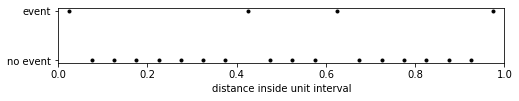

In [2]:
# Setup the parameters of the simulation.

# The average number of events per unit interval. This can be any value. We use
# 3.5 as an example.

mu = 3.5

# The number of sub-intervals into which we divide the unit interval. We start
# with a small n for demonstration purposes but will increase it later to get
# more accurate results.

n = 20

# The probability of observing one event in each sub-interval. This is the same
# for each sub-interval since we assume they are identical.

p = mu / n

# How many events occur in one interval and what are the distances between
# consecutive events?

# For each of the n sub-intervals, generate a random value to check whether an
# event occurred with probability p, and store the result.

events_occurred = np.empty(n)  # Create an empty array with n slots
for i in range(n):
    events_occurred[i] = sts.uniform.rvs(loc=0, scale=1) < p

print(
    f'The result of simulating {n} sub-intervals of width {1/n} with an\n'
    f'average rate of {mu} events in the whole unit interval and\n'
    f'{mu/n} events per sub-interval\n')

print('Events:')
print(events_occurred)
print()

total_events = np.sum(events_occurred)
print(f'We observe {total_events} events in total')

distances = np.diff(np.nonzero(events_occurred)[0]) / n
print(f'The distances between consecutive events are: {distances}')

plt.figure(figsize=(8, 1))
plt.plot(np.arange(0.5, n+0.5)/n, events_occurred, 'k.')
plt.xlabel('distance inside unit interval')
plt.xlim(0, 1)
plt.yticks([0, 1], ['no event', 'event'])
plt.show()

Let's try that with a larger $n$. So, more sub-intervals and a smaller probability of an event per sub-interval.

Furthermore, we change the way we generate random events to make the code more efficient – see below.

We observe 6 events in total
The distances between consecutive events are: [0.17 0.2  0.48 0.01 0.07]


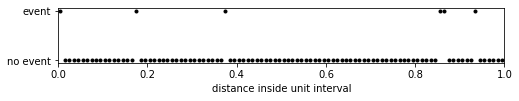

In [3]:
n = 100
p = mu / n

# In the previous cell, we generated events using a for-loop. Using NumPy, we
# can do this faster and with less code by generating n uniform random numbers
# in one line and comparing all of them to p.

# So, instead of doing this:

events_occurred = np.empty(n)
for i in range(n):
    events_occurred[i] = sts.uniform.rvs(loc=0, scale=1) < p

# We now do this, to get the same results:

events_occurred = sts.uniform.rvs(loc=0, scale=1, size=n) < p

# Compute the total events and distances and plot the events

total_events = np.sum(events_occurred)
print(f'We observe {total_events} events in total')

distances = np.diff(np.nonzero(events_occurred)[0]) / n
print(f'The distances between consecutive events are: {distances}')

plt.figure(figsize=(8, 1))
plt.plot(np.arange(0.5, n+0.5)/n, events_occurred, 'k.')
plt.xlabel('distance inside unit interval')
plt.xlim(0, 1)
plt.yticks([0, 1], ['no event', 'event'])
plt.show()

## Run an experiment

Next, we run an experiment with 10,000 trials using $n=1000$ and still $\mu=3.5$. We record how many events occur in each trial and what the distances between consecutive events are. We'll use these recorded values to plot histograms and compare them to the theoretical results.

The number of events in one interval should follow a Poisson distribution (according to the theory) and the distances between consecutive events should follow an exponential distribution.

In [4]:
n = 1000  # Number of sub-intervals
p = mu / n

# The more trials we run, the more accurate our results become since we average
# out the random effects.

number_of_trials = 10000

# We use the lists below to record all results from all 10,000 runs of the
# simulation. Note that we record 1 value for the number of events at the end
# of each trial but many values for the distances between these events.

total_events = []
distances = []

for trial in range(number_of_trials):
    events_occurred = sts.uniform.rvs(loc=0, scale=1, size=n) < p
    total_events.append(np.sum(events_occurred))
    distances.extend(np.diff(np.nonzero(events_occurred)[0]) / n)

## Distribution over the number of events: Poisson

Below we plot a histogram of the number of events in the unit interval and plot the probability mass function of the Poisson distribution on top of it to show how they line up. They match well.

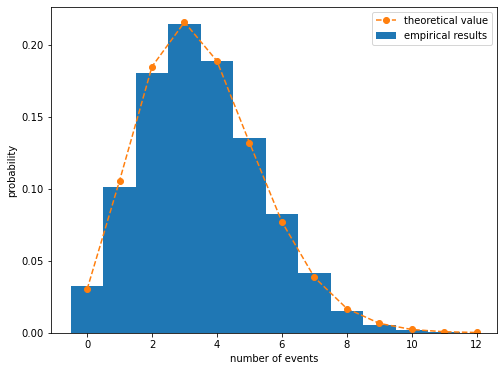

In [5]:
plt.figure(figsize=(8, 6))

# Plot a histogram of simulated event counts

plt.hist(
    total_events, bins=max(total_events), align='left', density=True,
    label='empirical results')

# Plot the theoretical distribution - Poisson with rate parameter mu

x = np.arange(0, max(total_events)+1)
plt.plot(x, sts.poisson.pmf(x, mu), 'o--', label='theoretical value')

plt.xlabel('number of events')
plt.ylabel('probability')
plt.legend()
plt.show()

## Distribution over the distances between events: exponential

Next, we plot a histogram of the distances between consecutive events along with the theoretical exponential distribution. This time, the empirical and theoretical results do not seem to match very well.

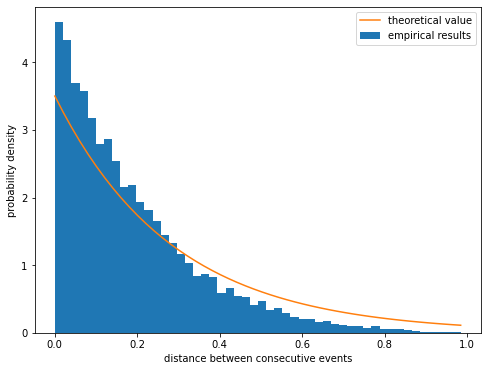

In [6]:
plt.figure(figsize=(8, 6))

# Plot a histogram of simulated distances

plt.hist(distances, bins=50, density=True, label='empirical results')

# Plot the theoretical distribution - exponential with rate parameter mu. Note
# that we have to use a scale rather than a rate parameter in SciPy. Scale is
# always defined as 1/rate.

x = np.linspace(0, max(distances))
plt.plot(x, sts.expon.pdf(x, scale=1/mu), '-', label='theoretical value')

plt.xlabel('distance between consecutive events')
plt.ylabel('probability density')
plt.legend()
plt.show()

It turns out, the simulation we have so far is correct for counting the number of events in a unit interval but is incorrect for computing the distances between consecutive events.

The problem is that when we generate events in only 1 unit interval (with $n$ sub-intervals), we miss the cases where the distance between consecutive events is greater than 1. This might seem unlikely if the average number of events per unit interval is 3.5 but it can happen. If we simulate a larger interval, namely 10 unit intervals rather than 1 unit interval, we can observe some of these longer waiting times and add them to our results.

In [7]:
# We use the same n and mu but not below that we generate events for 10*n
# sub-intervals rather than just 1. This corresponds to simulating 10 unit
# intervals rather than just 1.

intervals = 10
sub_intervals = intervals * n

distances = []
for trial in range(number_of_trials):
    events_occurred = sts.uniform.rvs(loc=0, scale=1, size=sub_intervals) < p
    distances.extend(np.diff(np.nonzero(events_occurred)[0]) / n)

This is what the results for a single unit interval in the final trial looks like. It looks similar to what we had before. In this case, we actually observed 0 events which meant we cannot compute the distance between consecutive events. This is precisely the problem we're trying to address.

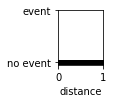

In [8]:
plt.figure(figsize=(8/10, 1))
plt.plot(np.arange(0.5, n+0.5)/n, events_occurred[:n], 'k.')
plt.xlabel('distance')
plt.xlim(0, 1)
plt.yticks([0, 1], ['no event', 'event'])
plt.show()

We plot the first two unit intervals. The dotted vertical line indicates the boundary between the first two unit intervals.

Here we see two events in the second interval. The distance to the first event is approximately 1.2 and the distance between the first and the second events seems to be approximately 0.3.

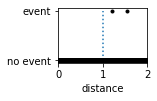

In [9]:
plt.figure(figsize=(8/10*2, 1))
plt.plot(np.arange(0.5, 2*n+0.5)/n, events_occurred[:2*n], 'k.')
plt.vlines(1, 0, 1, linestyle=':')
plt.xlabel('distance')
plt.xlim(0, 2)
plt.yticks([0, 1], ['no event', 'event'])
plt.show()

Below we visualize all 10 unit intervals from the last trial in the experiment. We see more events spread out over the 10 unit intervals. The first two unit intervals are the same as the ones visualized above. Note the large gaps between some events, which we would not (or would very rarely) observe when looking at only a single unit interval. Being able to simulate these larger gaps allows us to generate more accurate empirical results.

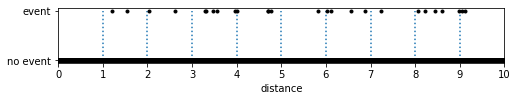

In [10]:
plt.figure(figsize=(8, 1))
plt.plot(np.arange(0.5, 10*n+0.5)/n, events_occurred, 'k.')
plt.vlines(np.arange(1, 10), 0, 1, linestyle=':')
plt.xlabel('distance')
plt.xlim(0, 10)
plt.xticks(range(11))
plt.yticks([0, 1], ['no event', 'event'])
plt.show()

Now we plot the empirical and theoretical distributions over distances again. This time they match much more closely.

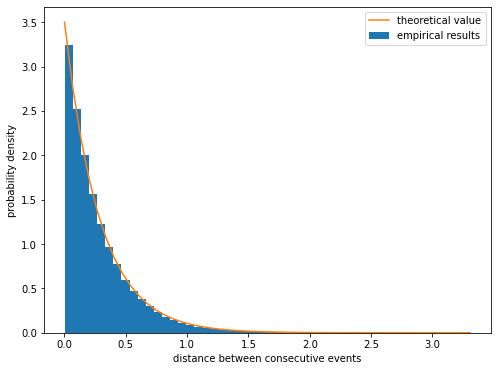

In [11]:
plt.figure(figsize=(8, 6))

# Plot a histogram of simulated distances

plt.hist(distances, bins=50, density=True, label='empirical results')

# Plot the theoretical distribution - exponential with rate parameter mu. Note
# that we have to use a scale rather than a rate parameter in SciPy. Scale is
# always defined as 1/rate.

x = np.linspace(0, max(distances))
plt.plot(x, sts.expon.pdf(x, scale=1/mu), '-', label='theoretical value')

plt.xlabel('distance between consecutive events')
plt.ylabel('probability density')
plt.legend()
plt.show()

# Questions

## 1

1 - This assumption is used to set up the distribution for the arrival <br>

2 - This is also used to set up the distributions for both arrival and departure <br>

3 - Because the rate is still the same <br>

4 - Because if we simulate with 1 unit interval, we miss the cases where the distance between consecutive events is greater than 1

## 2

1 - $$ L = \frac{\rho^2}{2(1-\rho)}  $$
$$ \rho = \frac{\lambda}{\mu} = \frac{\frac{1}{3}}{\frac{1}{2.5}} = 0.8333 $$
$$ L = \frac{0.8333^2}{2(1-0.8333)} = 2.083 $$

2 - 
using little's law
$$ L = \lambda W = \frac{1}{3} \frac{\rho}{\mu-\lambda} = \frac{1}{3} \frac{0.8333}{\frac{1}{2.5}-\frac{1}{3}} $$
$$ = 4.167 $$


3 - 
$$ R_{M/D/1} =\frac{1}{\mu} + \frac{\rho}{2\mu(1-\rho)} = 2.5 + \frac{0.8333}{\frac{2}{2.5}(1-0.8333)} = 8.748 $$
$$ R_{M/M/1} =\frac{1}{\mu} + \frac{\rho}{\mu-\lambda} = 2.5 + \frac{0.8333}{\frac{1}{2.5}-\frac{1}{3}} = 14.999 $$

## 3

1 - They are both M/M/3 <br>

2 - The same?

## 4

I think that #TheoreticalAnalysis was at the core of this pcw as a whole. From the analysis of the assumptions in the first question, to the mathematical analysis of the second question.